In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from skimage import color
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# Check for GPU availability
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    print('GPU is available')
else:
    print('No GPU detected')

num_gpus = len(physical_devices)

if num_gpus > 0:
    print(f"Number of available GPUs: {num_gpus}")
    for i in range(num_gpus):
        print(f"GPU {i}: {tf.config.experimental.get_device_details(physical_devices[0])}")
else:
    print("No GPUs available")

device = tf.device('gpu:0' if len(physical_devices) > 0 else 'cpu:0')

GPU is available
Number of available GPUs: 1
GPU 0: {'compute_capability': (7, 5), 'device_name': 'Tesla T4'}


In [ ]:
# Function to extract PCA features from an image
def extract_pca_features(image, n_components=50):
    # Assuming image is a 3D array representing the color image
    # Reshape to (num_pixels, num_channels)
    flat_image = image.reshape((-1, image.shape[-1]))

    # Apply PCA
    pca = PCA(n_components=min(n_components, flat_image.shape[0], flat_image.shape[1]))
    pca_features = pca.fit_transform(flat_image)
    return pca_features.flatten()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/pattern project/final project/Eye_diseases/dataset'
os.listdir(data_dir)
train_data = image_dataset_from_directory(data_dir, shuffle=True, image_size=(128, 128))

Found 4237 files belonging to 4 classes.


In [ ]:
# Extract PCA features from the training set
n_components = 50
train_features = []
train_labels = []

In [ ]:
for images, labels in train_data:
    features = []
    for image in images.numpy():
        pca_features = extract_pca_features(image, n_components=n_components)
        features.append(pca_features)
        print("PCA Features:", pca_features)  # Print the features for each image
    train_features.extend(features)
    train_labels.extend(labels.numpy())

Streaming output truncated to the last 5000 lines.
PCA Features: [2.5665390e+02 7.6435766e+00 1.8941976e-01 ... 2.5667984e+02 7.6537333e+00
 1.7927544e-01]
PCA Features: [-7.90704193e+01 -6.54703915e-01 -1.06992442e-02 ... -7.90670929e+01
 -6.50438249e-01 -1.14615755e-02]
PCA Features: [-64.38394    -3.6227665   0.8727748 ... -64.38337    -3.6230164
   0.8745001]
PCA Features: [-93.594666    2.0932012   2.614765  ... -93.58924     2.094171
   2.6066434]
PCA Features: [-77.73625      1.408633     0.2801014  ... -77.74027      1.4139593
   0.27782777]
PCA Features: [-112.54793       0.55413556    0.54159194 ... -112.54804       0.5525203
    0.5390747 ]
PCA Features: [214.74223  -19.44061   -8.070682 ... 214.74121  -19.44007   -8.07042 ]
PCA Features: [197.15894      1.3360604   -0.7305452  ... 197.16321      1.3317358
  -0.72690225]
PCA Features: [-65.04339     3.0466158   0.7718688 ... -65.04261     3.0476596
   0.7704384]
PCA Features: [-177.07893      -0.35073453    0.31319565 ... -1

In [ ]:
# Convert to NumPy arrays
train_features = np.array(train_features)
train_labels = np.array(train_labels)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

SVM

In [ ]:
from sklearn import svm

extra


In [ ]:
# Necessary imports
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris  # Example dataset

# Load dataset (using Iris dataset as an example, replace with your own data)
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the SVM classifier
SVM = svm.SVC(kernel='linear', probability=True)
SVM.fit(X_train, y_train)

# Now the classifier is trained, you can use it for predictions


SVC(kernel='linear', probability=True)

In [ ]:
# Predict on the test set
y_pred = SVM.predict(X_test)

In [ ]:
# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
# Binarize labels for multiclass ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

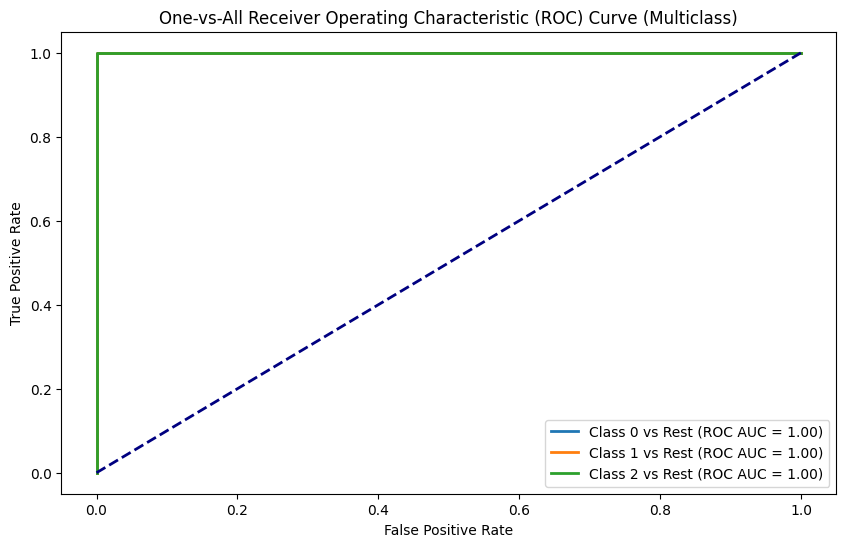

In [ ]:
# Predict probabilities on the test set for ROC curve
y_probs = SVM.predict_proba(X_test)

# Plot ROC curve for each class against the rest
plt.figure(figsize=(10, 6))
for i in range(len(np.unique(y_test))):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} vs Rest (ROC AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-All Receiver Operating Characteristic (ROC) Curve (Multiclass)')
plt.legend(loc='lower right')
plt.show()

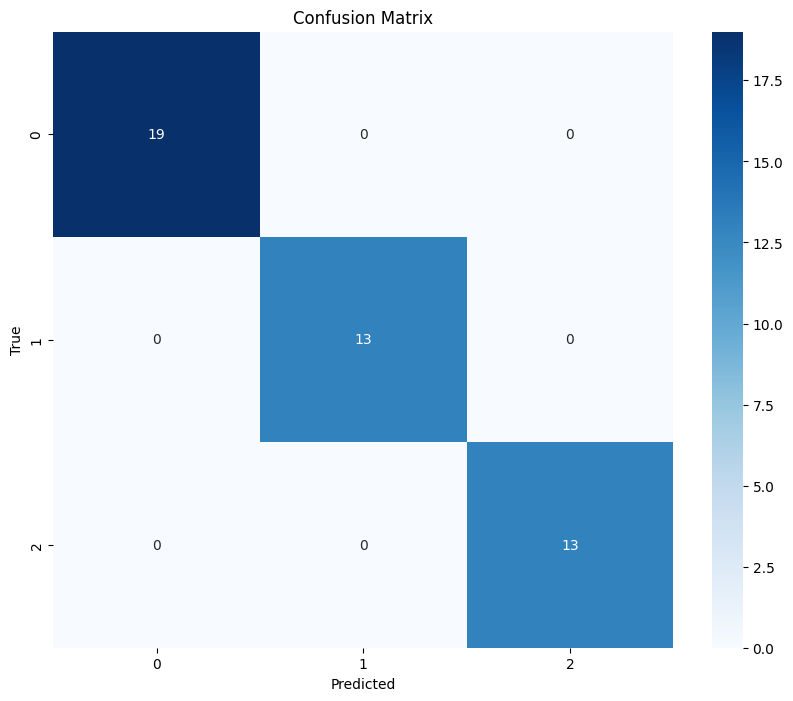

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()